# Color Organ
### EE16B: Designing Information Devices and Systems II, Spring 2019
-----

## Table of Contents

* [Lab Note](note4_colororgan1.pdf)
* [Part 1: Frequency Response of the Speaker-Microphone System](#part1)
* [Part 2: Bass-ic Color Organ](#part2)
* [Part 3: A Treble-some Color Organ](#part3)

-----


## <span style="color:#ba190f"> *Make sure you read the Introduction and Part 1 of the [lab note](note4_colororgan1.pdf) before beginning!*</span>
-----

<a id='part1'></a>
# <span style="color:navy">Part 1: Frequency Response of the Speaker-Microphone System</span>

### Materials
- micboard
- power supply
- oscilloscope
- 100 k$\Omega$ resistor
- Phone speaker or headphones

## Tasks

### 1.1. Tune your micboard

**Setup:**
1. Start by making sure that your micboard is powered by **5V at VDD** and **-5V at VSS**.
2. Make sure **OS2 is grounded** and **OS1 is connected to ground by a 100K ohm** resistor.
3. Connect an oscilloscope cable to the output.
4. Display a **peak to peak measurement** for the current channel on the oscilloscope.

**Now you are ready to tune your micboard!**
1. **Play a pure tone in the midband range** (1200 - 5000 Hz) on your phone at a reasonable volume. Make sure to point the speaker directly at the mic and hold it a few inches away from the mic.
2. Turn the potentiometer (with a screwdriver instead of your fingers for finer increments in gain) until you see an a sine wave with a **peak-to-peak around 5V** on your oscilloscope.

<span style="color:green">**Congratulations! You have successfully tuned your micboard!**</span>


### 1.2. Measure the frequency response of the speaker-microphone system
The purpose of this task is to learn how your Speaker-Microphone system will react to different frequencies. You can refer to your findings for guidance on choosing gains for the amplifiers for individual bands of your color organ. 

1. **Make sure the gain of your mic board is set so you get a maximum peak-to-peak voltage of 4-5 volts.**
2. Keep your smart phone / speaker at a fixed distance from your micboard.
    - You will need to place the phone at a distance from the micboard which ensures no audio frequency causes the mic output to rail (hit Vdd or Vss from the power supply).
3. Use the oscilloscope to collect the amplitude of $V_{out}$ (peak-to-peak voltage on the oscilloscope) at each frequency of array `freq` in the code.
    - We do not have a measurable input signal $V_{in}$, so we normalize the maximum of the frequency response to 1. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

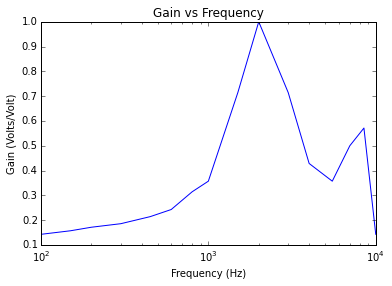

In [3]:
#Record the amplitude of the output sinusoid at each given frequency
freq = [100, 150, 200, 300, 450, 600, 800, 1000, 1500, 2000, 3000, 4000, 5500, 7000, 8500, 10000]

# TODO: replace these values
Vpp = [1, 1.1, 1.2, 1.3, 1.5, 1.7, 2.2, 2.5, 5, 7, 5, 3, 2.5, 3.5, 4, 1]

gain = np.array(Vpp)/max(Vpp)

plt.semilogx(freq, gain)
plt.title('Gain vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volt)')

<span style="color:#075a04"> **1.1. What do you notice about the shape of this function? Which frequencies result in large output?**</span>

< _YOUR ANSWER HERE_ >

<span style="color:#075a04"> **1.2. What does the plot tell you about the loudness of your speaker at certain frequencies? Does this reflect your experience listening to music?**</span>

Hint: low frequencies correspond to the bass in a song. Try playing something [bass-heavy :)](https://youtu.be/rCuBBaLtXQQ)

< _YOUR ANSWER HERE_ >

<span style="color:#075a04">**1.3. Ultimately you want your circuit to have around the same output gain for all frequencies. Suggest a way to do this using components you've learned about in class and lecture.**</span>

< _YOUR ANSWER HERE_ >

------

<a id='part2'></a>
## <span style="color:navy">Part 2: *Bass*ic Color Organ</span>

### Materials
- Capacitors
- Resistors
- Op-amps
- LEDs
- Function generator
- Oscilloscope

## Questions

<span style="color:#075a04">**2.1. Read Part 2 of the [note](link here) and complete the question in the gray box.**</span>

<span style="color:#075a04">**2.2. On the same sheet of paper you used for layout (see q. 2.1.), draw the circuit diagram for a first-order low pass RC filter.**</span>

<span style="color:#075a04">**2.3. Find an equation for the cutoff frequency $f_c$.**</span>

< _YOUR ANSWER HERE_ >

## Tasks

### 2.1. Low pass filter

1. Choose values for $R$ and $C$ s.t. your cutoff frequency $f_c$ is in the range 100 - 200 Hz.
    - Since we have far more resistor values than we have capacitors values, choose an easy capacitor value. Try to pick one that that lets you choose resistors in the 1k - 10k$\Omega$ range.
2. Record your values for $R$, $C$, and $f_c$ in the code below.
3. Build the low-pass filter on your breadboard.
    - We will have three different filters, so budget your space accordingly! 
4. **Test your filter with the function generator and oscilloscope to make sure that the corner frequency is what you expected.**
    - *This part is very important!* Suppose you were to build the entire Color Organ in one go, and then we found out the filters seemed to not be working correctly. It would be really difficult to figure out which one is causing the problem!

In [ ]:
### YOUR CODE HERE
R = ...
C = ...
f_c = ...

print("Low pass filter")
print("===============")
print("Resistor: {} ohms".format(R))
print("Capacitor: {} farads".format(C))
print("Cutoff frequency: {} Hz".format(f_c))

### 2.2. Amplify $V_{out}$

After filtering, you might find that the signal isn't quite large enough to turn on the LEDs reliably - we can fix this with amplification.

1. Build a non-inverting amplifier with a gain of 2
    - **You may need to change the gain later** depending on your setup and the music you want to play, and it might become a buffer in the end
    - Use the same rail voltages as the mic board (+/-5V)
    - Remember that the output voltage needs in the range of Volts, and different LEDs will require different amounts of voltage to turn them on.
2. Connect the output of your filter to the input of your amplifier, and the output of your amplifier to a 10 $\Omega$ resistor and LED as shown below.
3. Make some noises at your microphone. Does the LED flash?
    - Try playing some different frequencies from [this tone generator website](http://www.szynalski.com/tone-generator/) and make sure the LED lights up for lower tones rather than high ones.
    - It may be easier to see this on a scope, so don't forget to probe the output too.
4. **If the LED doesn't turn on then you may need more gain or your filter corner might be too low.**
    - Refer back to the frequency response you earlier in the lab to see how you may need to adjust the gain or cutoff frequency.

![low-pass-flow](images/low-pass-flow.png)

-----
<a id='part3'></a>
## <span style="color:navy">Part 3: A *Treble*-some Color Organ</span>

### Materials
- Task 2 setup
- Capacitors
- Resistors
- Op-amps
- LEDs
- Function generator
- Oscilloscope

## Questions

<span style="color:#075a04">**3.1. Read Part 3 of the [lab note](note4_colororgan1.pdf).**</span>

<span style="color:#075a04">**3.2. On the sheet of paper you used for 2.1 and 2.2, draw the circuit diagram for a first-order high pass RC filter.**</span>

<span style="color:#075a04"> **3.3. Find an equation for the cutoff frequency $f_c$.**</span>

< _YOUR ANSWER HERE_ >

## Tasks

1. Choose values for $R$ and $C$ s.t. your cutoff frequency $f_c$ is in the range 6000 - 8000 Hz.
    - Since we have far more resistor values than we have capacitor values, choose an easy capacitor value. Try to pick one that that lets you choose resistors in the 1k - 10k $\Omega$ range.
    - Because the frequencies are attentuated slowly in a first order filter, you may want to choose a corner frequency closer to the middle of the High Frequencies range.
    - You can always change your corner frequency later.
2. Record your values for $R$, $C$, and $f_c$ in the code below.
3. Build the high-pass filter on your breadboard.
    - We will have three different filters, so budget your space accordingly! 
4. **Test your filter with the function generator and oscilloscope to make sure that the corner frequency is what you expected.**
5. Follow your filter with another non-inverting amplifier and LED/resistor just like before.
6. Use the function generator instead of the mic board as the input to your circuit (both high pass and low pass filters).
    - Don't remove the mic board - just disconnect the wire from the OUT pin!
    - Vary the frequency of the signal from the function generator: does only one LED turn on at a time?
7. Connect your circuit to the micboard so that it resembles the diagram below.
    - Try playing some music to your very basic color organ and watch it flash in time to the music!
    - Feel free to mix up your gain and corner frequencies to make the LEDs more sensitive if you don't like how they look.

![low-high-flow](images/low-high-flow.png)

In [ ]:
### YOUR CODE HERE
R = ...
C = ...
f_c = ...

print("High pass filter")
print("================")
print("Resistor: {} ohms".format(R))
print("Capacitor: {} farads".format(C))
print("Cutoff frequency: {} Hz".format(f_c))

Try playing some music to your very basic color organ and watch it flash in time to the music! Feel free to mix up your gain and corner frequencies to make the LEDs more sensitive if you don't like how they look.

-----


<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">

<h1 style="color:green">Checkoff</h1>


- <span style="color:#075a04"> Show your GSI your System's Frequency Response and your Bass and Treble LEDs flashing independently to varying frquencies.</span>
- <span style="color:#075a04">Show your GSI your paper with your layout and circuit diagrams.</span>
 
# <span style="color:red">KEEP YOUR CIRCUIT FOR NEXT WEEK! YOU WILL NEED IT!</span>